Comparando Árvore isolada com Random Forest<br/>
Trilha 5: Random Forest

In [140]:
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score
from sklearn.preprocessing import StandardScaler

In [141]:
#Obtendo o Dataset
data = load_breast_cancer()
X=data['data']
y=data['target']

In [142]:
X[:1],y[:1]#  primeira linha do dataset e do target

(array([[1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
         3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
         8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
         3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
         1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01]]),
 array([0]))

In [143]:
#Nomes das Features
data['feature_names']

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [144]:
data['target_names']

array(['malignant', 'benign'], dtype='<U9')

In [145]:
#standardização das features (muitas ordens de grandeza diferentes)
scaler=StandardScaler()
XS=scaler.fit_transform(X)

In [146]:
XS[:1]

array([[ 1.09706398, -2.07333501,  1.26993369,  0.9843749 ,  1.56846633,
         3.28351467,  2.65287398,  2.53247522,  2.21751501,  2.25574689,
         2.48973393, -0.56526506,  2.83303087,  2.48757756, -0.21400165,
         1.31686157,  0.72402616,  0.66081994,  1.14875667,  0.90708308,
         1.88668963, -1.35929347,  2.30360062,  2.00123749,  1.30768627,
         2.61666502,  2.10952635,  2.29607613,  2.75062224,  1.93701461]])

In [161]:
#Split train test
X_train, X_test, y_train, y_test = train_test_split(
    XS, y, test_size=0.3,stratify=y,random_state=51)

In [162]:
#criação do modelo Random Forest
rf=RandomForestClassifier(n_estimators=100, max_depth=5,random_state=51)

In [163]:
#Treinamento do modelo Random Forest
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=5, random_state=51)

In [164]:
#Criação do modelo da árvore de decisão
ad=DecisionTreeClassifier(max_depth=5,random_state=51)

In [165]:
#Treinamento do modelo da árvore de decisão
ad.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5, random_state=51)

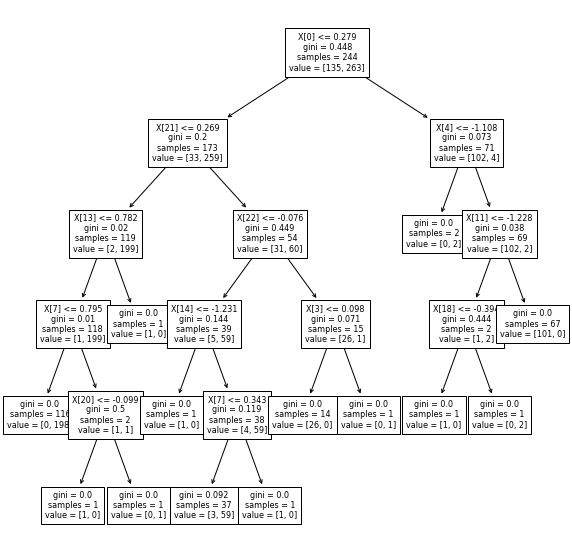

In [166]:
#mostrando a primeira árvore da floresta
plt.figure(figsize=(10,10))
tree.plot_tree(rf.estimators_[0],fontsize=8) 
plt.show()

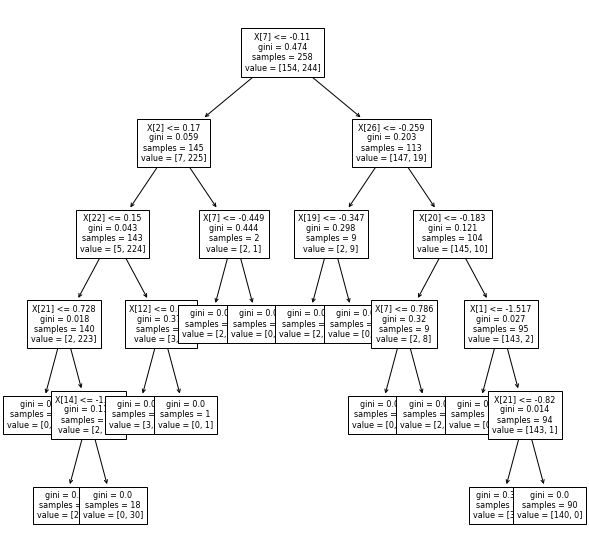

In [168]:
#mostrando a segunda árvore da floresta
plt.figure(figsize=(10,10))
tree.plot_tree(rf.estimators_[1],fontsize=8) 
plt.show()

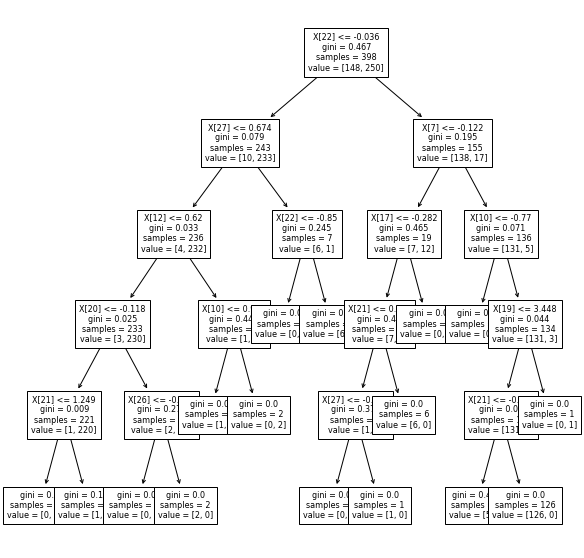

In [169]:
#mostrando a árvore de decisão de comparação
plt.figure(figsize=(10,10))
tree.plot_tree(ad,fontsize=8) 
plt.show()

In [172]:
#avaliação Random Forest
yerf=rf.predict(X_test)
print('Random Forest')
print('acurácia=',accuracy_score(y_test,yerf))
print('precision=',precision_score(y_test,yerf,pos_label=0))
print('recall=',recall_score(y_test,yerf,pos_label=0))

Random Forest
acurácia= 0.935672514619883
precision= 0.8955223880597015
recall= 0.9375


In [173]:
#avaliação Árvore de decisão de Comparação
yead=ad.predict(X_test)
print('Árvore de Decisão de Comparação')
print('acurácia=',accuracy_score(y_test,yead))
print('precision=',precision_score(y_test,yead,pos_label=0))
print('recall=',recall_score(y_test,yead,pos_label=0))

Árvore de Decisão de Comparação
acurácia= 0.8888888888888888
precision= 0.8082191780821918
recall= 0.921875


In [177]:
#Acurácia no treino: Random Forest
yet=rf.predict(X_train)
accuracy_score(y_train,yet)

0.992462311557789

In [178]:
#Acurácia no treino: Árvore única
yeta=ad.predict(X_train)
accuracy_score(y_train,yeta)

0.992462311557789